In [3]:
import numpy as np 
import pandas as pd 
import os 
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6


In [4]:
display (os.getcwd())

'C:\\Users\\HP\\Desktop\\ML'

In [5]:
os.chdir ('C:\\Sohan\\ML_Acmegrade\\ML Day17 6\\PRJ Stock Price Prediction\\')
display (os.getcwd())


'C:\\Sohan\\ML_Acmegrade\\ML Day17 6\\PRJ Stock Price Prediction'

In [6]:
df =pd.read_csv("prices.csv", header=0)
display (df)


,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0
...,...,...,...,...,...,...,...
851259,2016-12-30,ZBH,103.309998,103.199997,102.849998,103.930000,973800.0
851260,2016-12-30,ZION,43.070000,43.040001,42.689999,43.310001,1938100.0
851261,2016-12-30,ZTS,53.639999,53.529999,53.270000,53.740002,1701200.0
851262,2016-12-30 00:00:00,AIV,44.730000,45.450001,44.410000,45.590000,1380900.0


In [7]:
print(df.shape)

(851264, 7)


In [8]:
print(df.columns)

Index(['date', 'symbol', 'open', 'close', 'low', 'high', 'volume'], dtype='object')


In [9]:
df.symbol.value_counts()


KSU     1762
NOC     1762
ORCL    1762
OMC     1762
OKE     1762
        ... 
KHC      378
HPE      304
CSRA     284
WLTW     251
FTV      126
Name: symbol, Length: 501, dtype: int64

In [12]:
ticker_symbol = df.symbol.unique()
ticker_symbol

array(['WLTW', 'A', 'AAL', 'AAP', 'AAPL', 'ABC', 'ABT', 'ACN', 'ADBE',
       'ADI', 'ADM', 'ADP', 'ADS', 'ADSK', 'AEE', 'AEP', 'AES', 'AET',
       'AFL', 'AGN', 'AIG', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALK', 'ALL',
       'ALXN', 'AMAT', 'AME', 'AMG', 'AMGN', 'AMP', 'AMT', 'AMZN', 'AN',
       'ANTM', 'AON', 'APA', 'APC', 'APD', 'APH', 'ARNC', 'ATVI', 'AVB',
       'AVGO', 'AVY', 'AWK', 'AXP', 'AYI', 'AZO', 'BA', 'BAC', 'BAX',
       'BBBY', 'BBT', 'BBY', 'BCR', 'BDX', 'BEN', 'BHI', 'BIIB', 'BK',
       'BLK', 'BLL', 'BMY', 'BSX', 'BWA', 'BXP', 'C', 'CA', 'CAG', 'CAH',
       'CAT', 'CB', 'CBG', 'CBS', 'CCI', 'CCL', 'CELG', 'CERN', 'CF',
       'CHD', 'CHK', 'CHRW', 'CI', 'CINF', 'CL', 'CLX', 'CMA', 'CMCSA',
       'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP', 'COF', 'COG', 'COH',
       'COL', 'COO', 'COP', 'COST', 'CPB', 'CRM', 'CSCO', 'CSX', 'CTAS',
       'CTL', 'CTSH', 'CTXS', 'CVS', 'CVX', 'CXO', 'D', 'DAL', 'DD', 'DE',
       'DFS', 'DG', 'DGX', 'DHI', 'DHR', 'DIS', 'DISCA', 'DISCK', 

In [13]:
display(df.symbol.unique().shape) #means there are 501 companies

(501,)

In [14]:
print(len(df.symbol.values)) #basically no. of rows

851264


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851264 entries, 0 to 851263
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    851264 non-null  object 
 1   symbol  851264 non-null  object 
 2   open    851264 non-null  float64
 3   close   851264 non-null  float64
 4   low     851264 non-null  float64
 5   high    851264 non-null  float64
 6   volume  851264 non-null  float64
dtypes: float64(5), object(2)
memory usage: 45.5+ MB


In [13]:
# Gives the details of each column of the dataset like mean, max, etc
df.describe()

,open,close,low,high,volume
count,851264.000000,851264.000000,851264.000000,851264.000000,8.512640e+05
mean,70.836986,70.857109,70.118414,71.543476,5.415113e+06
std,83.695876,83.689686,82.877294,84.465504,1.249468e+07
min,0.850000,0.860000,0.830000,0.880000,0.000000e+00
25%,33.840000,33.849998,33.480000,34.189999,1.221500e+06
50%,52.770000,52.799999,52.230000,53.310001,2.476250e+06
75%,79.879997,79.889999,79.110001,80.610001,5.222500e+06
max,1584.439941,1578.130005,1549.939941,1600.930054,8.596434e+08


In [14]:
df.isnull().sum()
#here we get 0 means no null values

date      0
symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64

In [15]:
df.date.unique()

array(['2016-01-05 00:00:00', '2016-01-06 00:00:00',
       '2016-01-07 00:00:00', ..., '2016-12-28', '2016-12-29',
       '2016-12-30'], dtype=object)

In [15]:
df.date.unique().shape

(3524,)

In [17]:
df.duplicated().sum()
#gd no duplicate values

0

In [18]:
comp_info = pd.read_csv('securities.csv')
comp_info


,Ticker symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",NaN,66740
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",31-03-1964,1800
2,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",31-12-2012,1551152
3,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",06-07-2011,1467373
4,ATVI,Activision Blizzard,reports,Information Technology,Home Entertainment Software,"Santa Monica, California",31-08-2015,718877
...,...,...,...,...,...,...,...,...
500,YHOO,Yahoo Inc.,reports,Information Technology,Internet Software & Services,"Sunnyvale, California",NaN,1011006
501,YUM,Yum! Brands Inc,reports,Consumer Discretionary,Restaurants,"Louisville, Kentucky",06-10-1997,1041061
502,ZBH,Zimmer Biomet Holdings,reports,Health Care,Health Care Equipment,"Warsaw, Indiana",NaN,1136869
503,ZION,Zions Bancorp,reports,Financials,Regional Banks,"Salt Lake City, Utah",NaN,109380


In [19]:
comp_info["Ticker symbol"].nunique()

505

In [20]:
comp_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Ticker symbol            505 non-null    object
 1   Security                 505 non-null    object
 2   SEC filings              505 non-null    object
 3   GICS Sector              505 non-null    object
 4   GICS Sub Industry        505 non-null    object
 5   Address of Headquarters  505 non-null    object
 6   Date first added         307 non-null    object
 7   CIK                      505 non-null    int64 
dtypes: int64(1), object(7)
memory usage: 31.7+ KB


In [21]:
comp_info.isnull().sum()

Ticker symbol                0
Security                     0
SEC filings                  0
GICS Sector                  0
GICS Sub Industry            0
Address of Headquarters      0
Date first added           198
CIK                          0
dtype: int64

In [22]:
comp_info.describe()

,CIK
count,5.050000e+02
mean,7.074490e+05
std,5.144375e+05
min,1.800000e+03
25%,8.631200e+04
50%,8.310010e+05
75%,1.075531e+06
max,1.659166e+06


In [23]:
# Search for Particular company details 
# for locating specific data here.... in security column of string that starts with "Face"
comp_info.loc[comp_info.Security.str.startswith('Face') , :]


,Ticker symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK
181,FB,Facebook,reports,Information Technology,Internet Software & Services,"Menlo Park, California",23-12-2013,1326801


In [24]:
comp_info.Security.str.startswith('Face')#this works as a statement thats true for the row where a string that starts with Face is present

0      False
1      False
2      False
3      False
4      False
       ...  
500    False
501    False
502    False
503    False
504    False
Name: Security, Length: 505, dtype: bool

In [25]:
comp_info.loc[comp_info.Security.str.startswith('Acc') , :]

,Ticker symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK
3,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",06-07-2011,1467373


In [26]:
comp_plot = comp_info.loc[(comp_info["Security"] == 'Yahoo Inc.') 
                          | (comp_info["Security"] == 'Xerox Corp.') | (comp_info["Security"] == 'Adobe Systems Inc')
              | (comp_info["Security"] == 'Microsoft Corp.') | (comp_info["Security"] == 'Adobe Systems Inc') 
              | (comp_info["Security"] == 'Facebook') 
                          | (comp_info["Security"] == 'Goldman Sachs Group') , ]
display(comp_plot)

,Ticker symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK
6,ADBE,Adobe Systems Inc,reports,Information Technology,Application Software,"San Jose, California",05-05-1997,796343
181,FB,Facebook,reports,Information Technology,Internet Software & Services,"Menlo Park, California",23-12-2013,1326801
212,GS,Goldman Sachs Group,reports,Financials,Investment Banking & Brokerage,"New York, New York",NaN,886982
306,MSFT,Microsoft Corp.,reports,Information Technology,Systems Software,"Redmond, Washington",01-06-1994,789019
496,XRX,Xerox Corp.,reports,Information Technology,IT Consulting & Other Services,"Norwalk, Connecticut",NaN,108772
500,YHOO,Yahoo Inc.,reports,Information Technology,Internet Software & Services,"Sunnyvale, California",NaN,1011006


In [27]:
# here we locate Ticker symbol of company with security like Yahoo, Xerox, Adobe etc,
# then taking their no. of times entry and thier "Ticker symbol"
# In the result, left side 6.181,212 etc the index values corresponds to the selected companies from  comp info 

comp_plot = comp_info.loc[(comp_info["Security"] == 'Yahoo Inc.') 
                          | (comp_info["Security"] == 'Xerox Corp.') | (comp_info["Security"] == 'Adobe Systems Inc')
              | (comp_info["Security"] == 'Microsoft Corp.') | (comp_info["Security"] == 'Adobe Systems Inc') 
              | (comp_info["Security"] == 'Facebook') 
                          | (comp_info["Security"] == 'Goldman Sachs Group') , ["Ticker symbol"] ]["Ticker symbol"] 
print(comp_plot)


6      ADBE
181      FB
212      GS
306    MSFT
496     XRX
500    YHOO
Name: Ticker symbol, dtype: object


In [28]:
# For Loop to display 6 Company names 
for i in comp_plot:
    print (i)


ADBE
FB
GS
MSFT
XRX
YHOO


In [29]:
# Create a function to plot Graphs for selected companies  opening stock and closing stock against time 
def plotter(code):
    # Function used to create graphs for 6 companies 
    global closing_stock ,opening_stock
    #creating plot of all 6 company for opening and closing stock  total 12 graphs
    # Below statement create 2X2 empty chart 
    f, axs = plt.subplots(2,2,figsize=(15,8))
    # total 12 graphs
    # creating plot opening prize of particular company
    plt.subplot(212)
    #taking name of the company as code, get all records related to one company
    company = df[df['symbol']==code]
    #taking the values of one company and taking its open column values to 1D array
    company = company.open.values.astype('float32')
    #reshaping the open stock value from 1D  to 2D .
    company = company.reshape(-1, 1)
    # putting the value of company in opening_stock 
    opening_stock = company
    # plotting the data with green graph between "Time" and "prices vs time"
    
    plt.grid(True)# enalbling the grid in graph
    plt.xlabel('Time') # setting X axis as time
    # setting Y axis as company name + open stock prices
    plt.ylabel(code + " open stock prices") 
    plt.title('prices Vs Time') # setting title
    plt.plot(company , 'g') # calling the graph with green graph line
    
    # creating plot closing prize of particular company
    plt.subplot(211)
    #taking name of the company as code
    company_close = df[df['symbol']==code]
    #taking the values of one company and taking its close column values
    company_close = company_close.close.values.astype('float32')
    #reshaping the open column value in 1D and calling it closing_stock
   # -1 for unknown dimension
    company_close = company_close.reshape(-1, 1)
    # putting company_close value in closing_stock 
    closing_stock = company_close
    # plotting the data graph between "Time" and "prices vs time"
    plt.xlabel('Time') # setting x axis as time
    plt.ylabel(code + " close stock prices")# setting y axis as company name + open stock prices
    plt.title('prices Vs Time') # setting title as price vs time
    plt.grid(True) # enabling the grid in graph
    plt.plot(company_close , 'b') #creating the data graph in blue graph line
    plt.show() # calling the graph


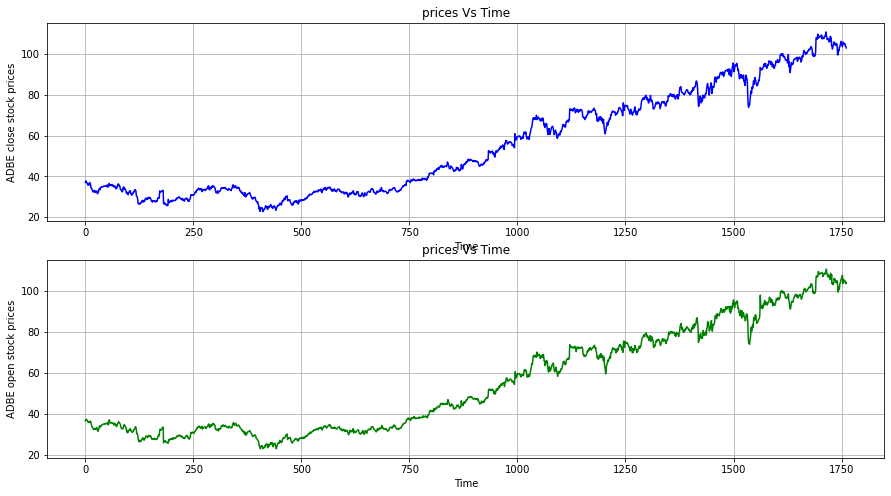

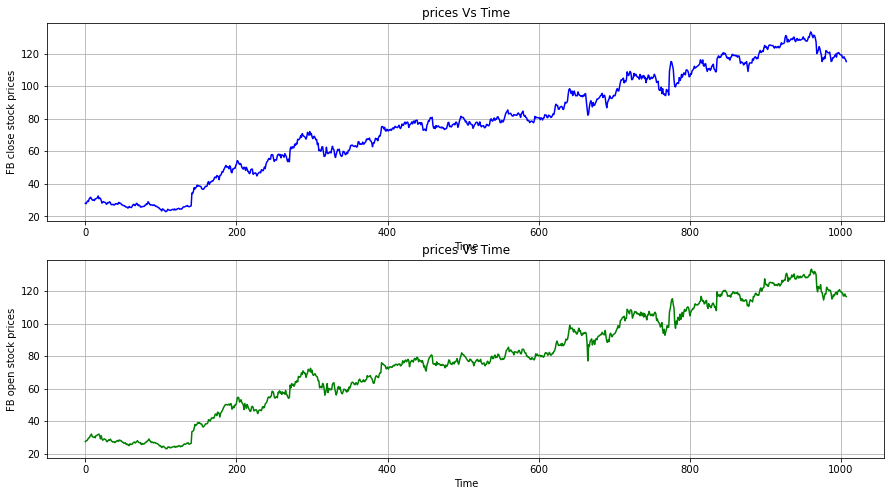

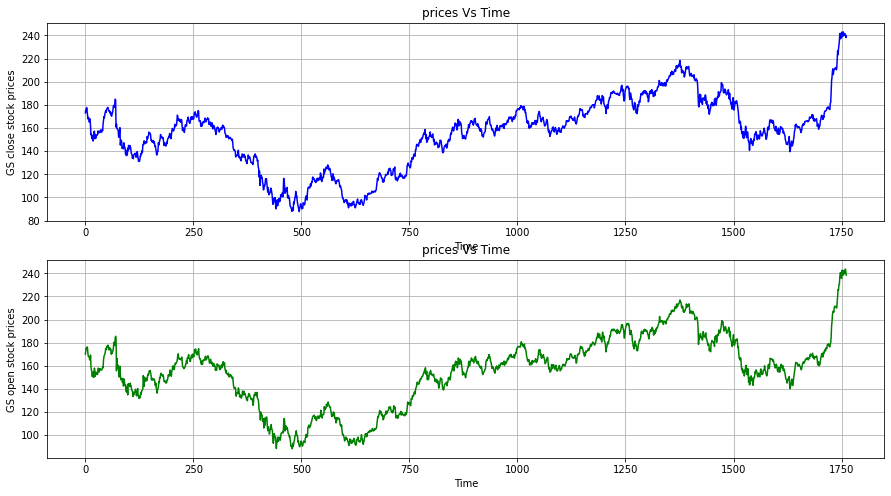

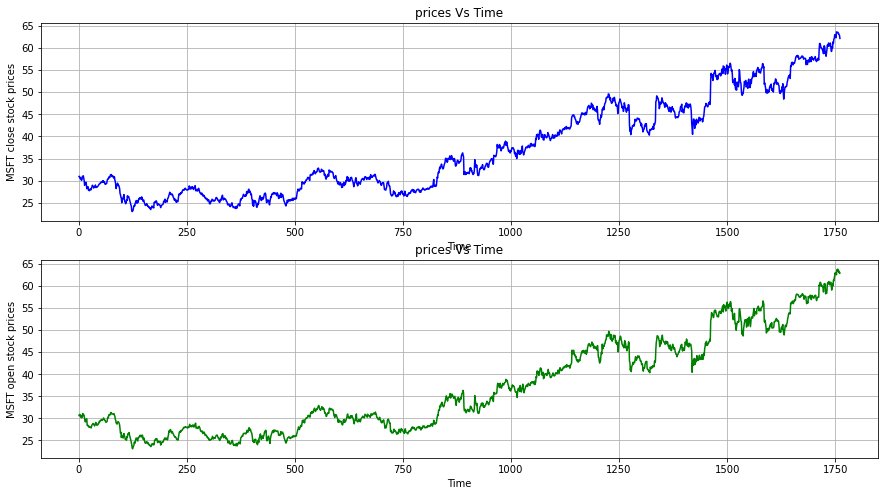

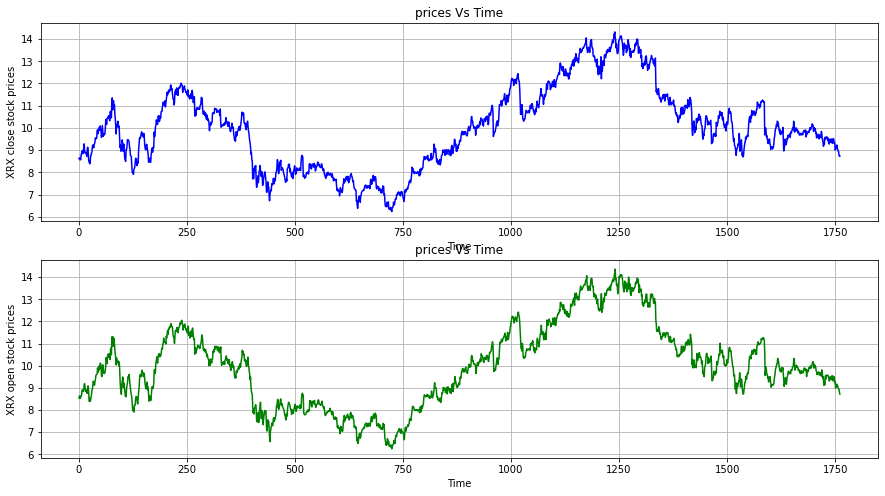

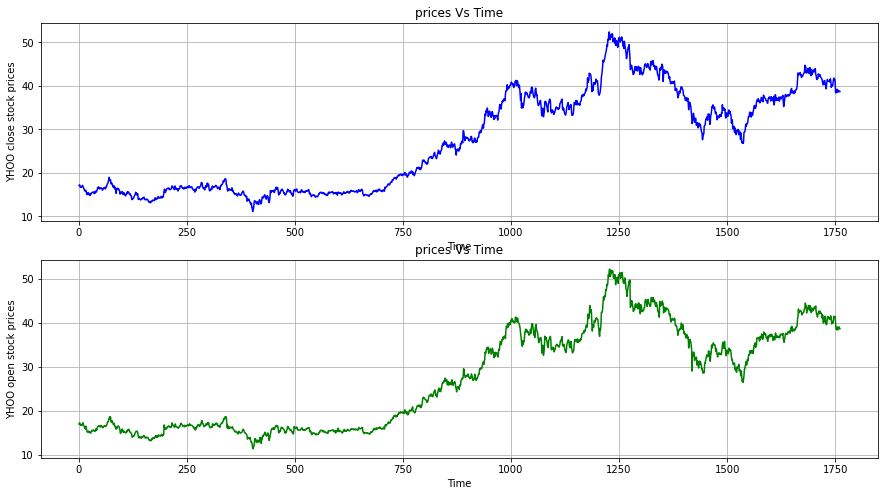

In [30]:
#Here i is company name 
for i in comp_plot:
    plotter(i) # func call


In [208]:
#prediction starts here
company_pred = str.upper(input("Enter the company's ticker symbol : "))
company_pred

Enter the company's ticker symbol : xrx


'XRX'

In [209]:
if company_pred in ticker_symbol:
    company_pred = company_pred
else:
    print("Incorrect ticker symbol ; here is the list of company's ticker symbol I can predict")
    print(ticker_symbol)
company_pred

'XRX'

In [210]:
stocks= np.array (df[df.symbol.isin ([company_pred])].close)
print(stocks)
#so now stocks contains the closing price of Yahoo!

[8.63 8.64 8.56 ... 8.76 8.72 8.73]


In [211]:
display (stocks.shape)

(1762,)

In [212]:
stocks = stocks.reshape(len(stocks) , 1)
print (stocks.shape)
print(stocks)
#converting array to 3D

(1762, 1)
[[8.63]
 [8.64]
 [8.56]
 ...
 [8.76]
 [8.72]
 [8.73]]


In [213]:
from sklearn.preprocessing import MinMaxScaler
#scaling features between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1)) 
stocks = scaler.fit_transform(stocks) 
display (stocks)
#to get rid of outliers

array([[0.29666255],
       [0.29789864],
       [0.28800989],
       ...,
       [0.31273177],
       [0.30778739],
       [0.30902349]])

In [214]:
#NOTE - for train to split we cant use random train to split, since here for prediction of stocks we need find trend(which can be done if data is in sequence of date)
# Train Test Split (80 % Training and 20 % Test Data)     

In [215]:
# Total Number of Records
print (stocks.shape) 


(1762, 1)


In [216]:
# 80 % Training record count   
train = int(len(stocks) * 0.80)
print (train)


1409


In [217]:
# 20 % record count    (Total – 80%)
test = len(stocks) - train 
print (test)


353


In [218]:
#divinding the values of stocks data to train from 0 to 1409 i.e 80% data
train = stocks[0:train]
display (train.shape)
print(train)


(1409, 1)

[[0.29666255]
 [0.29789864]
 [0.28800989]
 ...
 [0.58838072]
 [0.58590853]
 [0.57478368]]


In [219]:
#divinding the values of stocks data to test from train ending to stock data ending i.e rest 20% data
test = stocks[len(train) : ]
display(test.shape)
display (test)


(353, 1)

array([[0.62299135],
       [0.59950556],
       [0.5908529 ],
       [0.58343634],
       [0.59579728],
       [0.63535229],
       [0.62917182],
       [0.61928307],
       [0.59332509],
       [0.5512979 ],
       [0.45735476],
       [0.42398022],
       [0.46106304],
       [0.49443758],
       [0.50432633],
       [0.48702101],
       [0.43881335],
       [0.46229913],
       [0.4684796 ],
       [0.45488257],
       [0.51792336],
       [0.49443758],
       [0.50432633],
       [0.51915946],
       [0.50556242],
       [0.53770087],
       [0.54264524],
       [0.53770087],
       [0.5092707 ],
       [0.52904821],
       [0.50679852],
       [0.48825711],
       [0.47836836],
       [0.47589617],
       [0.42150803],
       [0.40296663],
       [0.43263288],
       [0.42150803],
       [0.44746601],
       [0.46229913],
       [0.46353523],
       [0.5092707 ],
       [0.5315204 ],
       [0.53399258],
       [0.52286774],
       [0.51668727],
       [0.48207664],
       [0.503

In [220]:
#creating function to create trainX,testX and target(trainY, testY)
def process_data(data , n_features):
    dataX, dataY = [], [] # creating data for dataset and dividing inta X,Y
    for i in range(len(data)-n_features):
        # taking i range from total size- 3 
        a = data[i:(i+n_features), 0]
        # Here a is value of data from i to i+ n_features, ie two values and put it in dataX 
        dataX.append(a) #putting a in dataX
        #here dataY takes the value of data of i + n_features
        dataY.append(data[i + n_features, 0])
        # putting i+ n_features in  dataY
    return np.array(dataX), np.array(dataY)
# returning dataX and dataY in array


In [221]:
n_features = 5
# Here we create train X, Train Y and test X, Test Y data where trainX, testX has two value is each block

trainX, trainY = process_data(train, n_features)
print(trainX.shape , trainY.shape)


(1404, 5) (1404,)


In [222]:
n_features = 5
testX, testY = process_data(test, n_features)
print (testX.shape , testY.shape)


(348, 5) (348,)


In [223]:
# Call the function to prepare full  data - 
n_features = 5
stocksX, stocksY = process_data(stocks, n_features)
print (stocksX.shape , stocksY.shape)


(1757, 5) (1757,)


In [224]:
display (trainX[:10])

array([[0.29666255, 0.29789864, 0.28800989, 0.29295426, 0.28924598],
       [0.29789864, 0.28800989, 0.29295426, 0.28924598, 0.31520396],
       [0.28800989, 0.29295426, 0.28924598, 0.31520396, 0.32385661],
       [0.29295426, 0.28924598, 0.31520396, 0.32385661, 0.33621755],
       [0.28924598, 0.31520396, 0.32385661, 0.33621755, 0.32880099],
       [0.31520396, 0.32385661, 0.33621755, 0.32880099, 0.32262052],
       [0.32385661, 0.33621755, 0.32880099, 0.32262052, 0.34487021],
       [0.33621755, 0.32880099, 0.32262052, 0.34487021, 0.32880099],
       [0.32880099, 0.32262052, 0.34487021, 0.32880099, 0.37700865],
       [0.32262052, 0.34487021, 0.32880099, 0.37700865, 0.33868974]])

In [225]:
display (trainY[:10])

array([0.31520396, 0.32385661, 0.33621755, 0.32880099, 0.32262052,
       0.34487021, 0.32880099, 0.37700865, 0.33868974, 0.32880099])

In [226]:
# Reshape to 3D array to use for LSTM /Deep Learning model 
# reshaping trainX and testX to use in deep learning model
trainX = trainX.reshape(trainX.shape[0] , 1 ,trainX.shape[1])
display (trainX.shape)


(1404, 1, 5)

In [227]:
# Reshape to 3D array test X 
testX = testX.reshape(testX.shape[0] , 1 ,testX.shape[1])
display (testX.shape)


(348, 1, 5)

In [228]:
# Reshape to 3D array  full data set 
stocksX= stocksX.reshape(stocksX.shape[0] , 1 ,stocksX.shape[1])
display (stocksX.shape)


(1757, 1, 5)

In [229]:
#Now finally we have sorted our data

In [230]:
# helps us do mathematical operations
import math 
# for setting layers one by one neural layer in model 
from keras.models import Sequential 
# types of layers
from keras.layers import Dense , BatchNormalization , Dropout , Activation 
# types of RNN
from keras.layers import LSTM , GRU 
#It puts the data in between given range to set data before putting layer
from sklearn.preprocessing import MinMaxScaler 
# In this method the errors in column is squared and then mean is found 
from sklearn.metrics import mean_squared_error 
# Optimizers used
from keras.optimizers import Adam , SGD , RMSprop


In [231]:
#Checkpointing the model when required and using other call-backs.
filepath="stock_weights1.hdf5"
from keras.callbacks import ReduceLROnPlateau , ModelCheckpoint
# ReduceLROnPlateau- This reduce the learning rate when the matrix stop improving or  too close to reduce overfitting
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.1, epsilon=0.0001, patience=1, verbose=1)
#This check point will stop processing, if the model is not improving.
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='max')


In [232]:
# creating model for training data using sequential to give series wise output between layers
model = Sequential()


In [233]:
# GRU or Gated Recurrent Unit used for matrix manipulation within Recurrent layer
#This is the input Layer 
model.add(GRU(256 , input_shape = (1 , n_features) , return_sequences=True))


In [234]:
#dropout is used to remove overfitting data on each layer of neural network
model.add(Dropout(0.4))
#to avoid overfitting

In [235]:
#Long Short Term Memory is a type of RNN specially used for time series problems
model.add(LSTM(256))


In [236]:
#dropout is used to remove overfitting data on each layer of neural network
model.add(Dropout(0.4))


In [237]:
#Dense layer are fully connected neural networks 
model.add(Dense(64 ,  activation = 'relu'))


In [238]:
#This is the output Layer, Output is only one neuron 
model.add(Dense(1))


In [239]:
#for getting the details of our models
print(model.summary())


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_4 (GRU)                 (None, 1, 256)            201984    
                                                                 
 dropout_8 (Dropout)         (None, 1, 256)            0         
                                                                 
 lstm_4 (LSTM)               (None, 256)               525312    
                                                                 
 dropout_9 (Dropout)         (None, 256)               0         
                                                                 
 dense_8 (Dense)             (None, 64)                16448     
                                                                 
 dense_9 (Dense)             (None, 1)                 65        
                                                                 
Total params: 743,809
Trainable params: 743,809
Non-tr

In [240]:
# Compile the Model 
# Selecting the loss measurement metrics and optimizer for our model, to find out mean square error
model.compile(loss='mean_squared_error', optimizer=Adam(lr = 0.0005) , metrics = ['mean_squared_error'])


In [241]:

# fitting the data i.e training the trainX, to relate to trainY
# epochs is the times each data in send to fit
# batch size is the size of information send at a time
# validation_data is the validation or data used for testing 
history = model.fit(trainX, trainY, epochs=100 , batch_size = 128 , 
          callbacks = [checkpoint , lr_reduce] , validation_data = (testX,testY))    


Epoch 1/100
10/11 [==========================>...] - ETA: 0s - loss: 0.2256 - mean_squared_error: 0.2256
Epoch 1: val_loss improved from -inf to 0.08149, saving model to stock_weights1.hdf5
11/11 [==============================] - 14s 275ms/step - loss: 0.2180 - mean_squared_error: 0.2180 - val_loss: 0.0815 - val_mean_squared_error: 0.0815 - lr: 5.0000e-04
Epoch 2/100
 9/11 [=======================>......] - ETA: 0s - loss: 0.0554 - mean_squared_error: 0.0554
Epoch 2: val_loss did not improve from 0.08149
11/11 [==============================] - 0s 35ms/step - loss: 0.0469 - mean_squared_error: 0.0469 - val_loss: 0.0126 - val_mean_squared_error: 0.0126 - lr: 5.0000e-04
Epoch 3/100
11/11 [==============================] - ETA: 0s - loss: 0.0196 - mean_squared_error: 0.0196
Epoch 3: val_loss did not improve from 0.08149
11/11 [==============================] - 0s 37ms/step - loss: 0.0196 - mean_squared_error: 0.0196 - val_loss: 0.0020 - val_mean_squared_error: 0.0020 - lr: 5.0000e-04
Epo

11/11 [==============================] - 0s 36ms/step - loss: 0.0058 - mean_squared_error: 0.0058 - val_loss: 0.0014 - val_mean_squared_error: 0.0014 - lr: 5.0000e-20
Epoch 23/100
11/11 [==============================] - ETA: 0s - loss: 0.0057 - mean_squared_error: 0.0057
Epoch 23: val_loss did not improve from 0.08149

Epoch 23: ReduceLROnPlateau reducing learning rate to 5.000000245224397e-22.
11/11 [==============================] - 0s 40ms/step - loss: 0.0057 - mean_squared_error: 0.0057 - val_loss: 0.0014 - val_mean_squared_error: 0.0014 - lr: 5.0000e-21
Epoch 24/100
11/11 [==============================] - ETA: 0s - loss: 0.0058 - mean_squared_error: 0.0058
Epoch 24: val_loss did not improve from 0.08149

Epoch 24: ReduceLROnPlateau reducing learning rate to 5.0000003461985925e-23.
11/11 [==============================] - 0s 36ms/step - loss: 0.0058 - mean_squared_error: 0.0058 - val_loss: 0.0014 - val_mean_squared_error: 0.0014 - lr: 5.0000e-22
Epoch 25/100
11/11 [==============

11/11 [==============================] - ETA: 0s - loss: 0.0057 - mean_squared_error: 0.0057
Epoch 43: val_loss did not improve from 0.08149

Epoch 43: ReduceLROnPlateau reducing learning rate to 4.99997305055738e-42.
11/11 [==============================] - 0s 37ms/step - loss: 0.0057 - mean_squared_error: 0.0057 - val_loss: 0.0014 - val_mean_squared_error: 0.0014 - lr: 5.0000e-41
Epoch 44/100
 9/11 [=======================>......] - ETA: 0s - loss: 0.0059 - mean_squared_error: 0.0059
Epoch 44: val_loss did not improve from 0.08149

Epoch 44: ReduceLROnPlateau reducing learning rate to 4.9998329207109475e-43.
11/11 [==============================] - 0s 33ms/step - loss: 0.0058 - mean_squared_error: 0.0058 - val_loss: 0.0014 - val_mean_squared_error: 0.0014 - lr: 4.9998e-42
Epoch 45/100
11/11 [==============================] - ETA: 0s - loss: 0.0056 - mean_squared_error: 0.0056
Epoch 45: val_loss did not improve from 0.08149

Epoch 45: ReduceLROnPlateau reducing learning rate to 5.0026

11/11 [==============================] - 0s 36ms/step - loss: 0.0057 - mean_squared_error: 0.0057 - val_loss: 0.0014 - val_mean_squared_error: 0.0014 - lr: 0.0000e+00
Epoch 68/100
11/11 [==============================] - ETA: 0s - loss: 0.0062 - mean_squared_error: 0.0062
Epoch 68: val_loss did not improve from 0.08149
11/11 [==============================] - 0s 37ms/step - loss: 0.0062 - mean_squared_error: 0.0062 - val_loss: 0.0014 - val_mean_squared_error: 0.0014 - lr: 0.0000e+00
Epoch 69/100
10/11 [==========================>...] - ETA: 0s - loss: 0.0058 - mean_squared_error: 0.0058
Epoch 69: val_loss did not improve from 0.08149
11/11 [==============================] - 0s 36ms/step - loss: 0.0058 - mean_squared_error: 0.0058 - val_loss: 0.0014 - val_mean_squared_error: 0.0014 - lr: 0.0000e+00
Epoch 70/100
11/11 [==============================] - ETA: 0s - loss: 0.0059 - mean_squared_error: 0.0059
Epoch 70: val_loss did not improve from 0.08149
11/11 [==============================

11/11 [==============================] - ETA: 0s - loss: 0.0056 - mean_squared_error: 0.0056
Epoch 93: val_loss did not improve from 0.08149
11/11 [==============================] - 0s 40ms/step - loss: 0.0056 - mean_squared_error: 0.0056 - val_loss: 0.0014 - val_mean_squared_error: 0.0014 - lr: 0.0000e+00
Epoch 94/100
11/11 [==============================] - ETA: 0s - loss: 0.0057 - mean_squared_error: 0.0057
Epoch 94: val_loss did not improve from 0.08149
11/11 [==============================] - 0s 39ms/step - loss: 0.0057 - mean_squared_error: 0.0057 - val_loss: 0.0014 - val_mean_squared_error: 0.0014 - lr: 0.0000e+00
Epoch 95/100
11/11 [==============================] - ETA: 0s - loss: 0.0059 - mean_squared_error: 0.0059
Epoch 95: val_loss did not improve from 0.08149
11/11 [==============================] - 0s 37ms/step - loss: 0.0059 - mean_squared_error: 0.0059 - val_loss: 0.0014 - val_mean_squared_error: 0.0014 - lr: 0.0000e+00
Epoch 96/100
11/11 [==============================

In [242]:
# Predict the value for testX, display top 10 records 

test_pred = model.predict(testX)
display (test_pred [:10])


11/11 [==============================] - 2s 8ms/step


array([[0.58021224],
       [0.5826032 ],
       [0.5861278 ],
       [0.59108347],
       [0.5922704 ],
       [0.58492136],
       [0.55544764],
       [0.5245902 ],
       [0.5004114 ],
       [0.48415416]], dtype=float32)

In [243]:
# Inverse Transform the data – Convert the data to Original form
test_pred = scaler.inverse_transform(test_pred)
display (test_pred [:10])


array([[10.923917],
       [10.94326 ],
       [10.971773],
       [11.011865],
       [11.021467],
       [10.962014],
       [10.723571],
       [10.473934],
       [10.278328],
       [10.146807]], dtype=float32)

In [244]:
# Reshape and Display Original Data 
testY = testY.reshape(testY.shape[0] , 1)
#Converting reshaped list in 1D array so that it will be efficient in plotting
testY = scaler.inverse_transform(testY)
# taking testY from 1 to 10
display (testY[:10])


array([[11.37],
       [11.32],
       [11.24],
       [11.03],
       [10.69],
       [ 9.93],
       [ 9.66],
       [ 9.96],
       [10.23],
       [10.31]])

In [245]:
# Display the accuracy 
from sklearn.metrics import r2_score
r2_score(testY,test_pred)


0.7155488777604382

Red - Predicted Stock Prices  ,  Blue - Actual Stock Prices


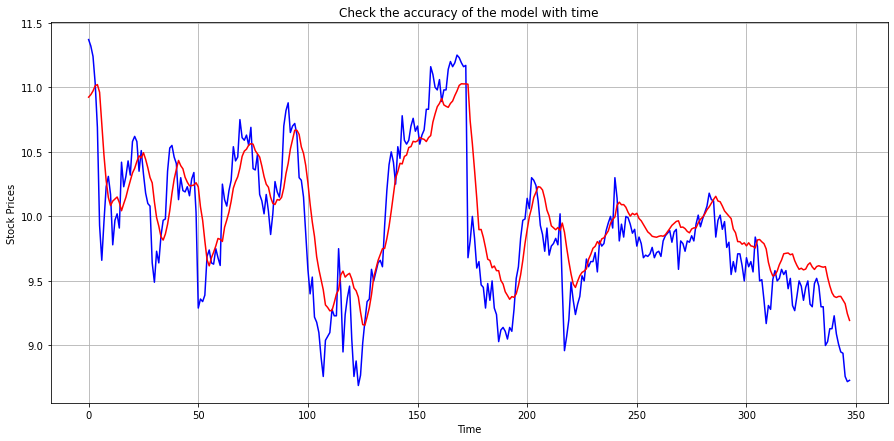

In [246]:
# Plot the Graph Actual and Predicted Data 
# Ploting the graph of stock prices with time
print("Red - Predicted Stock Prices  ,  Blue - Actual Stock Prices")
plt.rcParams["figure.figsize"] = (15,7)
# testY is the blue line
plt.plot(testY , 'b')
# pred is the red line
plt.plot(test_pred , 'r')
# Setting x axis as time
plt.xlabel('Time')
# Setting y axis as stock prices
plt.ylabel('Stock Prices')
# setting title 
plt.title('Check the accuracy of the model with time')
# enabling grids in graph 
plt.grid(True)
# it call the graph with labels, titles, lines
plt.show()


In [247]:
train_pred = model.predict(trainX)
train_pred = scaler.inverse_transform(train_pred)
trainY = trainY.reshape(trainY.shape[0] , 1)
trainY = scaler.inverse_transform(trainY)
print ('Display Accuracy Training Data')
display (r2_score(trainY,train_pred))


44/44 [==============================] - 0s 8ms/step
Display Accuracy Training Data


0.9398981451228778

Red - Predicted Stock Prices  ,  Blue - Actual Stock Prices


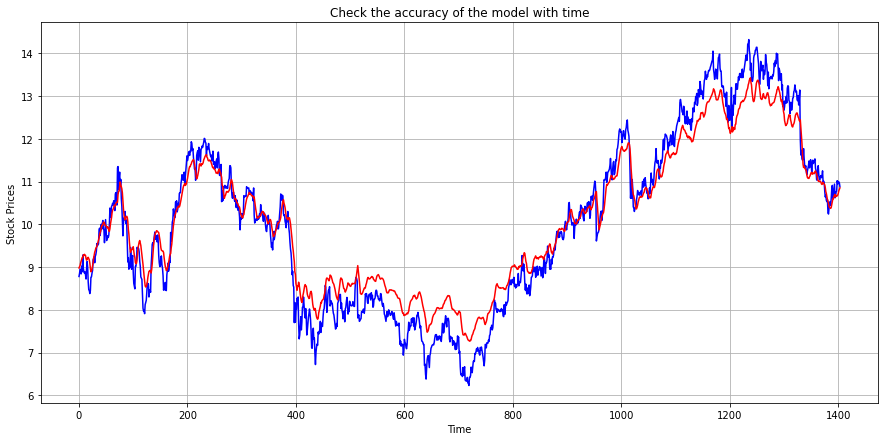

In [248]:
# Ploting the graph of stock prices with time - Training Data
print("Red - Predicted Stock Prices  ,  Blue - Actual Stock Prices")
plt.rcParams["figure.figsize"] = (15,7)
plt.plot(trainY  , 'b')
plt.plot(train_pred, 'r')
plt.xlabel('Time')
plt.ylabel('Stock Prices')
plt.title('Check the accuracy of the model with time')
plt.grid(True)
plt.show()


In [249]:
stocks_pred = model.predict(stocksX)
stocks_pred = scaler.inverse_transform(stocks_pred)
stocksY = stocksY.reshape(stocksY.shape[0] , 1)
stocksY = scaler.inverse_transform(stocksY)
print ('Display Accuracy Training Data')
display (r2_score(stocksY,stocks_pred))


55/55 [==============================] - 0s 7ms/step
Display Accuracy Training Data


0.9356326515243644

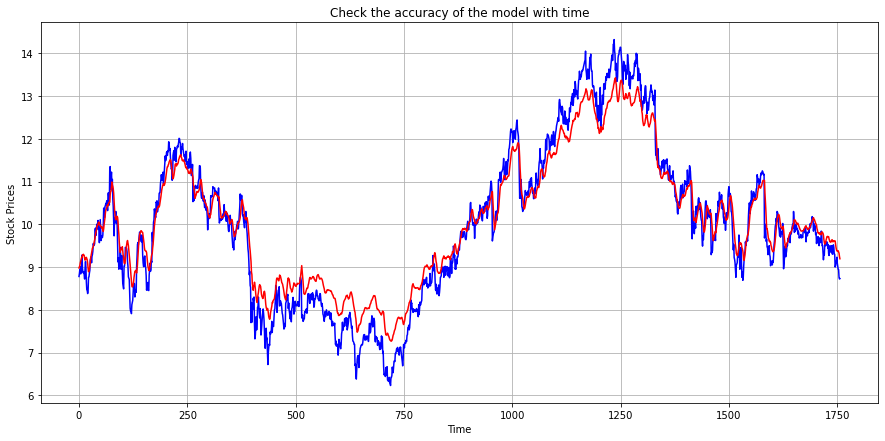

In [250]:
plt.rcParams["figure.figsize"] = (15,7)
plt.plot(stocksY  , 'b')
plt.plot(stocks_pred, 'r')
plt.xlabel('Time')
plt.ylabel('Stock Prices')
plt.title('Check the accuracy of the model with time')
plt.grid(True)
plt.show()


In [251]:
# Extract the data related to company - YHOO
results= df[df.symbol.isin ([company_pred])]
# Update the data frame starting with 2nd records , since first prediction is for 2nd record
results= results [2:]
# Reset the index 0, 1,2 etc
results = results.reset_index(drop=True)
# Convert Predicted Value to Data Frame
df_stocks_pred= pd.DataFrame(stocks_pred, columns = ['Close_Prediction'])
# Concat Original and prediction data
results= pd.concat([results,df_stocks_pred],axis =1)
results.to_excel('results.xlsx')
display(results)


,date,symbol,open,close,low,high,volume,Close_Prediction
0,2010-01-06,XRX,8.64,8.56,8.54,8.67,6941700.0,8.979805
1,2010-01-07,XRX,8.53,8.60,8.51,8.62,11880200.0,9.008636
2,2010-01-08,XRX,8.58,8.57,8.51,8.64,6482500.0,9.035612
3,2010-01-11,XRX,8.62,8.78,8.57,8.84,13900400.0,9.097867
4,2010-01-12,XRX,8.68,8.85,8.68,8.91,18706200.0,9.138777
...,...,...,...,...,...,...,...,...
1755,2016-12-23,XRX,8.99,8.95,8.92,9.01,5952600.0,9.246943
1756,2016-12-27,XRX,8.95,8.94,8.89,9.02,5072400.0,9.194375
1757,2016-12-28,XRX,8.93,8.76,8.73,8.96,6959000.0,NaN
1758,2016-12-29,XRX,8.79,8.72,8.69,8.82,7210600.0,NaN
